In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = load_iris()

In [3]:
dir(data)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [4]:
features = data.data
features_names = data.feature_names
target = data.target
target_names = data.target_names
# pd_target = pd.Series(target)
# pd_target.unique()
np.unique(features_names)
features_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
np.unique(target)

array([0, 1, 2])

In [6]:
colors = ['r', 'g', 'b']
markers = ['>', 'o', 's']

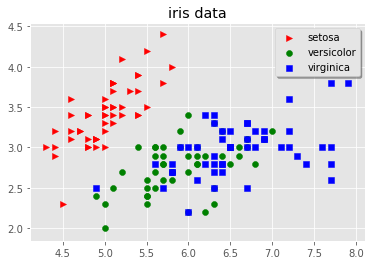

In [7]:
plt.style.use('ggplot')
for label, color, marker in zip(np.unique(target), colors, markers):
    plt.scatter(features[target==label, 0], features[target==label, 1], marker=marker, c=color, label=target_names[label])
plt.legend(shadow=True)
plt.title('iris data')
plt.show()

In [8]:
labels = target_names[target]

In [9]:
features_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
plength = features[:, 2]

In [11]:
import seaborn as sns

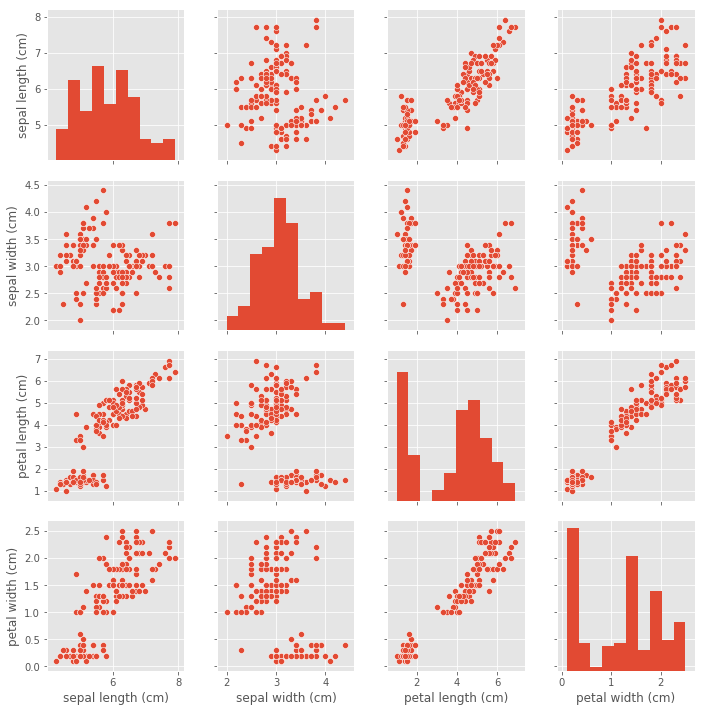

In [12]:
data_df = pd.DataFrame(data.data)
data_df.columns = features_names
sns.pairplot(data_df)

In [13]:
# features = data.data
# features_names = data.feature_names
# target = data.target
# target_names = data.target_names
# pd_target = pd.Series(target)
# pd_target.unique()
# np.unique(features_names)
# features_names

In [14]:
features_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
labels = target_names[target]

In [17]:
plength = features[:, 2]

In [18]:
is_setosa = (labels=='setosa')

In [19]:
max_setosa = plength[is_setosa].max()
max_setosa

1.9

In [20]:
min_non_setosa = plength[~is_setosa].min()
min_non_setosa

3.0

In [21]:

data_df['category'] = labels

In [22]:
data_df.loc[data_df.category=='setosa', 'petal length (cm)'].max()

1.9

In [23]:
data_df.loc[data_df.category!='setosa', 'petal length (cm)'].min()

3.0

In [24]:
data_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
features_2 = features[~is_setosa]
labels_2 = labels[~is_setosa]

In [26]:
is_virginica = (labels_2=='virginica')

In [27]:
best_acc = -1.0

In [28]:
for fi in range(features_2.shape[1]):
    thresh = features_2[:, fi]
    for t in thresh:
        feature_i = features_2[:, fi]
        pred = (feature_i > t)
        acc = (pred == is_virginica).mean()
        rev_acc = (pred == ~is_virginica).mean()
        if rev_acc > acc:
            reverse = True
            acc = rev_acc
        else:
            reverse = False
        
        if acc > best_acc:
            best_acc = acc
            best_t = t
            best_reverse = reverse


In [29]:
def is_virginica_test(fi, t, reverse, example):
    test = example[fi] > t
    if reverse:
        test = not test
    return test

In [94]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [86]:
seed_data = pd.read_csv(r'C:\Users\kuni\Desktop\titanic\BuildingMachineLearningSystemsWithPython-master\ch02\data\seeds.tsv', delimiter='\t', index_col=False, names=['area A', 'perimeter P', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'type'])
# seed_data.head()
seed_features = seed_data.drop(columns=['type'])
# seed_features.head()
seed_types = seed_data['type']
# seed_type.head()

In [98]:
means = []
neighbor = KNeighborsClassifier(n_neighbors=3)
# inclued normalization step will increace accuracy
classifier = Pipeline([('norm', StandardScaler()), ('knn', neighbor)])
kf = KFold(n_splits=5, random_state=1, shuffle=True)

for training, testing in kf.split(seed_features.values):
    classifier.fit(seed_features.values[training], seed_types.values[training])
    prediction = classifier.predict(seed_features.values[testing])
    curmean = np.mean(prediction == seed_types.values[testing])
    means.append(curmean)

print('Mean accuracy: %.3f' %np.mean(means))

Mean accuracy: 0.924
